# CogSci 131 Starter Kit

Written by Yuan Meng (GSI for Sections 104 & 106)

# NumPy basics

Python is the *de facto* language for machine learning and data science (Julia is gaining popularity, but still far behind; some in industry may use R but certainly not in production). Historians of programming languages may say NumPy ([Harris et al., 2020](https://www.nature.com/articles/s41586-020-2649-2)) heavily contributed to Python's prominence in scientific computing. 

NumPy allows you to easily manipulate arrays and matrices and carry out vectorized operations. Let's see how.

In [1]:
# import NumPy (alias it as "np")
import numpy as np

## Load NumPy arrays

Later in this semester, you will need to load NumPy arrays  with an extension of `.npy` or `.npz` to build models. Images are also in this format. 

In [2]:
# load response data
data = np.load("data/experiment_data.npy")
print(f"the response data has {data.shape[0]} rows and {data.shape[1]} columns")

the response data has 50 rows and 300 columns


In [3]:
# load participant ID's
participants = np.load("data/experiment_participants.npy")
print(f"there are {participants.shape[0]} participants in the dataset")

there are 50 participants in the dataset


In [4]:
# images are often saved as NumPy
panda = np.load("data/panda.npy")
print(f"there are {panda.shape[0]} by {panda.shape[1]} pixels in the panda image")

there are 276 by 460 pixels in the panda image


## Save NumPy arrays

### Save a single array 

In [5]:
np.save("data/experiment_data_copy.npy", data)

### Combine and save multiple 

Sometimes we want to combine all information from one experiment and save in one place. 

In [6]:
# create trial indices
trials = np.arange(1, 301)

In [7]:
# save 3 parts together
np.savez("data/experiment.npz", data=data, participants=participants, trials=trials)

In [8]:
# load the file we just saved
experiment = np.load("data/experiment.npz")

In [9]:
# check which arrays are included
experiment.files

['data', 'participants', 'trials']

In [10]:
# examine the data array
experiment["data"]

array([[1668.07869346,  774.38921876, 3161.14983152, ..., 2359.05394666,
         784.36404676,  448.33416341],
       [2419.38185232,  809.18389145, 2766.62648929, ..., 1159.47379735,
        1330.44887992, 1842.3268586 ],
       [2221.02887591, 1496.00517071,  354.95889145, ..., 1355.74575912,
        1205.29137942, 1385.71283365],
       ...,
       [1654.50469248,  518.3271927 , 5127.58599224, ..., 2544.1042064 ,
         624.07607332, 1029.57386246],
       [ 480.68016502, 4690.12200498, 1520.27397139, ..., 1000.40541618,
         988.73647145,  378.43452948],
       [1823.42891807, 3680.12951133, 3522.94413167, ...,  591.4133153 ,
         383.26367525, 1768.50528483]])

In [11]:
# examine the participant array
experiment["participants"]

array(['p_045', 'p_039', 'p_027', 'p_023', 'p_041', 'p_008', 'p_025',
       'p_019', 'p_036', 'p_049', 'p_050', 'p_029', 'p_032', 'p_006',
       'p_028', 'p_034', 'p_044', 'p_016', 'p_010', 'p_017', 'p_022',
       'p_033', 'p_042', 'p_009', 'p_047', 'p_035', 'p_002', 'p_014',
       'p_020', 'p_043', 'p_003', 'p_012', 'p_030', 'p_015', 'p_011',
       'p_018', 'p_004', 'p_040', 'p_001', 'p_031', 'p_005', 'p_013',
       'p_046', 'p_038', 'p_021', 'p_026', 'p_024', 'p_048', 'p_007',
       'p_037'], dtype='<U5')

In [12]:
# examine the trial array
experiment["trials"]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## Vectorized operations

If you remember none of the NumPy stuff from today, bake this image into your brain:

<img src="https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays.png" width="500" />

### Slice data

**Basic syntax**: The first letter is **inclusive** and the second letter is **exclusive** (for those who use R, remember Python is **0-indexed**)
- Select from a certain row: `array[i,k:m]` 
- Select from a certain column: `array[i:j,k]` 
- Select certain rows and columns: `array[i:j,k:m]` 

Some letters can be omitted when we select everything from the beginning, till the end, or from beginning to end.

In [13]:
# first 10 trials from the first participant
data[0, :10]

array([1668.07869346,  774.38921876, 3161.14983152, 3937.23787728,
        611.38691655,  399.14776341, 1111.57048745,  470.29895368,
        612.20448123,  846.03869235])

In [14]:
# last 10 trials from the first participant
data[0, -10:]

array([1246.45495393,  502.16101614,  381.30327137, 3114.43071479,
        253.18200384, 3361.94176519,  985.87382528, 2359.05394666,
        784.36404676,  448.33416341])

In [15]:
# all participants' data from first trial
data[:, 0]

array([1668.07869346, 2419.38185232, 2221.02887591, 1091.9748054 ,
        765.90901665, 1422.14432183, 2388.94052295,  764.13599359,
       3026.39924999, 2570.40740859,  739.74674303, 1540.53959543,
        487.47052912, 1014.13206373,  878.47944904,  858.12827316,
       1950.47567549, 5327.54617187, 2217.68804959,  808.7173633 ,
       2022.13958535, 2095.05446091,  815.01017763, 3610.23252802,
       1457.31492087, 2213.60701869, 1519.95398267,  453.099893  ,
       1894.80676887, 1980.00572049, 4160.31361689, 1895.03902268,
       1215.36516808,  794.31779535, 1726.70558939, 2916.47948689,
        528.28872097,  645.83224788, 1043.88516346,  343.86276825,
        954.43281503, 3034.30721272,  331.26713308,  980.06469437,
       1006.33831631, 3410.62421169, 1688.26554343, 1654.50469248,
        480.68016502, 1823.42891807])

In [16]:
# all participants' data from last trial
data[:, -1]

array([ 448.33416341, 1842.3268586 , 1385.71283365,  692.4137174 ,
       1953.97462007,  754.02714575,  364.0624492 ,  232.38117203,
        388.01764548, 1469.14318107, 1710.09941832,  243.11487601,
        538.66065837,  687.02624226, 1952.70558219, 1363.71899319,
        439.79438026,  403.42155942, 1056.04380176,  914.78912881,
        190.4807906 , 5144.29401498, 2051.73422166, 2511.07429219,
       1613.08610883,  526.82051108,  723.05119455,  836.42660957,
        383.74271736,  496.6772761 , 2899.12727155, 2335.51215397,
       1325.80964451,  572.34881727,  371.15657006,  268.01760324,
       1534.28166384,  945.53256075, 1357.67222437, 1599.83178441,
       4006.44139073,  427.55123124, 1604.97819212,  920.74161063,
        752.70831779, 2929.90705512, 1991.0552687 , 1029.57386246,
        378.43452948, 1768.50528483])

In [17]:
# 2nd to 9th trials for the 3rd to the 5th participants
data[2:5, 1:9]

array([[ 1496.00517071,   354.95889145,  2311.26016544,  1297.67551663,
         1448.96335795,  1601.7383793 ,   959.08317934,  4553.84280539],
       [16693.35578897,  1364.88371961,   539.89172745,   879.72631523,
          745.19128556,  1141.9787886 ,   608.72099674,  1458.74019485],
       [  586.9728176 ,   464.44592541,   664.26267815,  1403.12986529,
         2865.21113433,  2214.35180771,   747.75703411,  2268.83900604]])

### Aggregate by rows or columns

In [18]:
# reduce by row: each trial's mean across all participants
np.mean(data, axis=0)

array([1657.13105986, 2449.30603161, 1788.01031263, 2219.27755826,
       1817.84951359, 1718.22261262, 2088.53951113, 2425.04232291,
       1859.80002906, 2044.19069033, 1875.94110831, 2113.1235077 ,
       1916.5674031 , 2191.27748466, 2674.08274478, 1647.30191706,
       2401.3256511 , 1896.09167719, 2024.02271734, 2123.14613439,
       2282.87288101, 1720.45742968, 2291.17293072, 2096.08019298,
       1732.11999722, 2286.89927729, 2300.17361418, 2189.86601436,
       1942.50365714, 1807.44558554, 1948.47171463, 1892.81959934,
       2220.55593685, 2089.29674301, 2711.09503437, 2499.99532529,
       2244.65459307, 2252.01757711, 2143.82681369, 1648.32965019,
       2317.91416023, 2376.81998567, 2299.47020928, 2506.62120811,
       2190.02124728, 2213.4026493 , 2194.26522021, 1986.96513939,
       2081.52281659, 2266.34028652, 1863.15617567, 2081.75868618,
       2066.89159005, 1794.05631164, 1580.87108996, 1748.91227861,
       2072.94806905, 2092.27929237, 2291.78141065, 2156.49307

In [19]:
# reduce by column: each participant's mean across all trials
np.mean(data, axis=1)

array([1698.68801725, 1888.71240023, 1796.53362098, 1879.6038851 ,
       1882.53249686, 1824.79568606, 1746.75780815, 1748.55448988,
       1655.75347639, 1740.67757826, 1854.98538242, 1720.70259522,
       1675.2006642 , 1746.52724187, 1768.64738486, 1794.45589925,
       1860.06861469, 1835.73006077, 1520.77977686, 1795.55654863,
       1794.26437533, 1716.73345285, 1740.64166499, 1704.87601852,
       1906.06514665, 1722.68258855, 1857.70131135, 1878.26245376,
       1741.26393398, 1680.21711839, 1830.55940979, 1697.03486501,
       1892.45119973, 1888.69786047, 1653.73721041, 1794.17096019,
       1779.9941148 , 1832.42610672, 1861.63504795, 1685.20108106,
       1652.29647646, 1718.43799102, 1633.30628308, 1686.72435462,
       1810.54490061, 1703.7949561 , 1747.64361845, 1670.90982655,
       1830.47925898, 1771.15425183])

# Plotting with Matplotlib Pyplot

Certain things never stay in your brain 🧠: SQL, type I vs. type II errors... and plotting with `matplotlib.pyplot`. Highly recommend these [cheatsheets](https://github.com/matplotlib/cheatsheets) and the [official tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).

In [20]:
# import Pyplot library (alias it as "plt")
import matplotlib.pyplot as plt
# enable inline plotting
%matplotlib inline

## Create the "canvas"

Figure object: Figure(432x288)
Axis object: AxesSubplot(0.125,0.125;0.775x0.755)


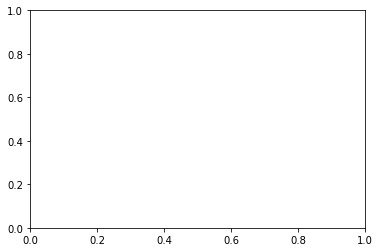

In [21]:
# just one plot
fig, ax = plt.subplots()
print("Figure object: " + str(fig))
print("Axis object: " + str(ax))
plt.show()

Figure object: Figure(432x288)
1st axis object: AxesSubplot(0.125,0.125;0.352273x0.755)
2nd axis object: AxesSubplot(0.547727,0.125;0.352273x0.755)


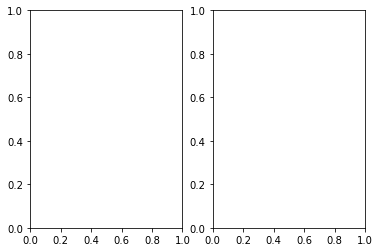

In [22]:
# one direction: horizontally stacked
fig, axes = plt.subplots(1, 2)
print("Figure object: " + str(fig))
print("1st axis object: " + str(axes[0]))
print("2nd axis object: " + str(axes[1]))

Figure object: Figure(432x288)
1st axis object: AxesSubplot(0.125,0.536818;0.775x0.343182)
2nd axis object: AxesSubplot(0.125,0.125;0.775x0.343182)


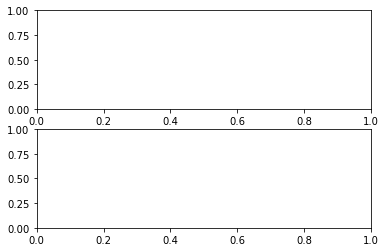

In [23]:
# one direction: veritically stacked
fig, axes = plt.subplots(2, 1)
print("Figure object: " + str(fig))
print("1st axis object: " + str(axes[0]))
print("2nd axis object: " + str(axes[1]))

Figure object: Figure(432x288)
1st axis object: AxesSubplot(0.125,0.536818;0.352273x0.343182)
2nd axis object: AxesSubplot(0.547727,0.536818;0.352273x0.343182)
3rd axis object: AxesSubplot(0.125,0.125;0.352273x0.343182)
4th axis object: AxesSubplot(0.547727,0.125;0.352273x0.343182)


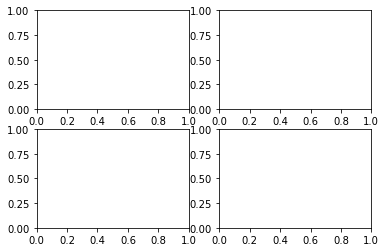

In [24]:
# two directions
fig, axes = plt.subplots(2, 2)
print("Figure object: " + str(fig))
print("1st axis object: " + str(axes[0, 0]))
print("2nd axis object: " + str(axes[0, 1]))
print("3rd axis object: " + str(axes[1, 0]))
print("4th axis object: " + str(axes[1, 1]))

## Add content and save

To plot a function, we first need to generate the data (floats in small increments). 

In [25]:
# create equally spaced 100 data in range 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# generate x and y data
x = 16 * (np.sin(theta) ** 3)
y = (
    13 * np.cos(theta)
    - 5 * np.cos(2 * theta)
    - 2 * np.cos(3 * theta)
    - np.cos(4 * theta)
)

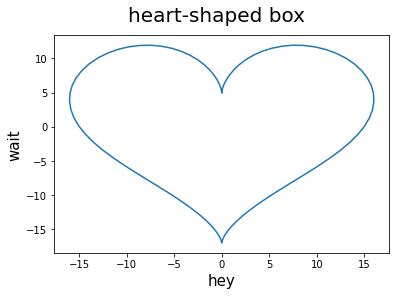

In [26]:
# use the ax object to plot
fig, ax = plt.subplots()
ax.plot(x, y)

# label axes and figure
ax.set_xlabel("hey", fontsize=15)
ax.set_ylabel("wait", fontsize=15)
fig.suptitle("heart-shaped box", fontsize=20)

# save figure to the figures directory
fig.savefig("figures/heart-shaped_box.png")

We can plot multiple curves, either in the same plot or across multiple.

In [27]:
# generate data for two functions
x = np.linspace(0, 10, 100)
y1, y2 = np.sin(x), np.cos(x)

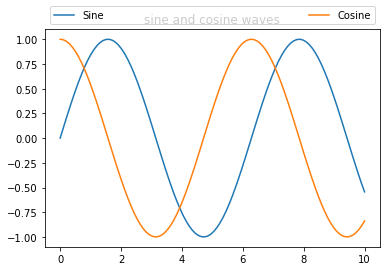

In [28]:
# we can plot two functions in one plot
fig, ax = plt.subplots()
ax.plot(x, y1, "C0", label="Sine")
ax.plot(x, y2, "C1", label="Cosine")
# but it's as good as nothing w/o a legend
ax.legend(bbox_to_anchor=(0, 1, 1, 0.1), ncol=2, mode="expand", loc="lower left")
ax.set_title("sine and cosine waves")

# save figure to the figures directory
fig.savefig("figures/sin_cos_combined.png")

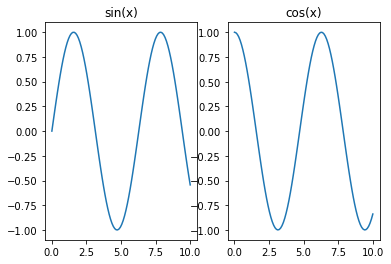

In [29]:
# or we can plot them in 2 subplots
fig, axes = plt.subplots(1, 2)

# left subplot
axes[0].plot(x, y1)
axes[0].set_title("sin(x)")

# right subplot
axes[1].plot(x, y2)
axes[1].set_title("cos(x)")

# save figure to the figures directory
fig.savefig("figures/sin_cos_seperate.png")

# Other Pythonic stuff

## Use for-loops

W3 Schools is a great source for learning programming and quickly brushing up knowledge. Check out their [for-loop tutorial](https://www.w3schools.com/python/python_for_loops.asp). In Python, **don't use for-loops if you don't have too**: When working with lists and dictionaries, you can use list or dictionary comprehension; when working with NumPy (or Pandas, TensorFlow, etc.), it's much better to use vectorized operations. That said, sometimes we may have to use for-loops, for instance:

> Write a function to compute the Gauss Summation $\displaystyle{\sum_{i}^{n} n}$ for $n = 1, 2, \ldots, 100$.

In [30]:
def compute_gauss_sum(start, end):

    # sum begins with 0
    total = 0

    # loop through 1 to 100 (we need to end at 101)
    for i in range(start, end + 1):
        # each iteration, add index to sum
        total += i

    # result should be 5050
    return total

In [31]:
# time to check the result
compute_gauss_sum(1, 100)

5050

## Generate random numbers

If you interview with Google for their data scientist positions once day, one question is definitely generating random numbers from a given distribution (but you can't use the random module). For this course, you can use a wide range of distributions offer by NumPy. Below are two toy examples.

In [32]:
# generate 10,000 random IQ scores from a Normal distributon
iqs = np.random.normal(100, 15, 1000)

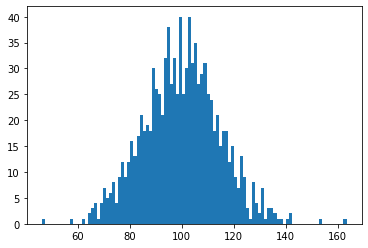

In [33]:
# plot a histogram (default is 30 bins)
fig, ax = plt.subplots()
ax.hist(iqs, bins=100)
plt.show()

In [34]:
# generate average revenue for 100,000 e-commere customers
avg_rev = (np.random.pareto(3, 10000) + 1) * 2

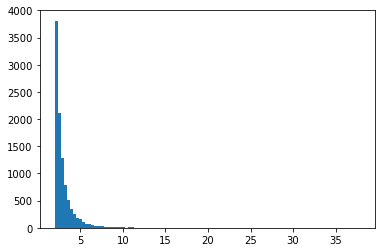

In [35]:
# plot another histogram
fig, ax = plt.subplots()
ax.hist(avg_rev, bins=100)
plt.show()